In [1]:
import pandas as pd

import numpy as np

import pylab as plt
import seaborn as sns
%matplotlib inline  

import statistics

In [2]:
pd.set_option('display.max_columns', None)  # es para enseñar todas las columnas del df

import warnings
warnings.simplefilter('ignore')

In [3]:
shark=pd.read_csv('../data/attacks.csv',encoding="latin1")

In [4]:
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
shark.columns.shape #tenemos 24 columnas

(24,)

In [6]:
shark.info(memory_usage="deep") # 25723 filas >> todas tienen nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

El case number es un identificador, por lo que vamos a rellenar los nan con números random distintos a los identificadores ya existentes, de manera que todos los ataques estén identificados

In [7]:
nan_cols=shark.isna().sum()
nan_cols[nan_cols>0]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [8]:
def check_nan(df):
    
    nan_cols=shark.isna().mean() * 100
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))

    sns.heatmap(df.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)
    
    plt.show();

'N nan cols: 24'

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

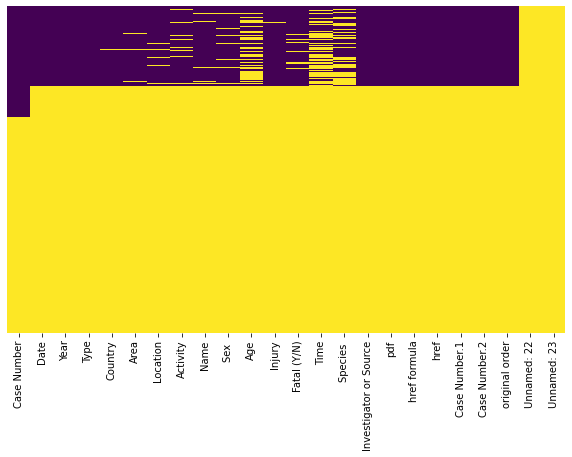

In [9]:
check_nan(shark)

In [10]:
nan_rows=shark.index[shark.isnull().all(1)] #lista de filas en las que todos los valores son nulos
nan_rows

Int64Index([ 8702,  8703,  8704,  8705,  8706,  8707,  8708,  8709,  8710,
             8711,
            ...
            25712, 25713, 25714, 25715, 25716, 25717, 25718, 25719, 25720,
            25721],
           dtype='int64', length=17020)

In [11]:
nan_rows.shape  

(17020,)

Un 66.17% de las filas (17020/25723) tienen todos sus valores nulos 
-podemos eliminar hasta el 20% de las filas, por lo que nos quedariamos con 20,578 filas 
-hay 8703 filas con datos






Vamos a eliminar todas las columnas con nulos y duplicar valores con datos hasta obtener una dataframe con al menos 20,000 filas

In [12]:
shark.drop(nan_rows,axis=0,inplace=True)

'N nan cols: 24'

Case Number                0.011490
Date                      27.588188
Year                      27.611169
Type                      27.634149
Country                   28.162703
Area                      32.816270
Location                  33.792945
Activity                  33.838906
Name                      30.001149
Sex                       34.080202
Age                       60.117201
Injury                    27.909916
Fatal (Y/N)               33.781455
Time                      66.126623
Species                   60.197633
Investigator or Source    27.783523
pdf                       27.588188
href formula              27.599678
href                      27.588188
Case Number.1             27.588188
Case Number.2             27.588188
original order            27.507756
Unnamed: 22               99.988510
Unnamed: 23               99.977019
dtype: float64

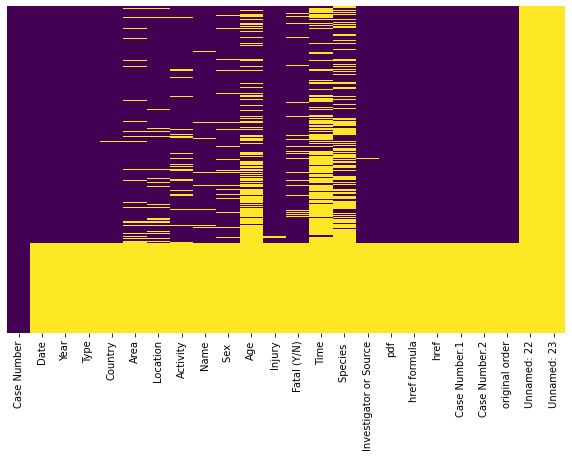

In [13]:
check_nan(shark)

Vemos que gran parte de las filas aun teniendo identificador no tienen datos relevantes, por lo que tambien los vamos a eliminar ya que no nos dan información relevante, luego decidire como añadir estos datos

In [14]:
shark.drop_duplicates(inplace=True)

In [15]:
#rellenamos las columnas unnamed 22 y unnamed 23 de 0. 

shark["Unnamed: 22"]=0
shark["Unnamed: 23"]=0

'N nan cols: 22'

Case Number                0.015845
Date                       0.142608
Year                       0.174299
Type                       0.205990
Country                    0.934876
Area                       7.352242
Location                   8.699097
Activity                   8.762478
Name                       3.470132
Sex                        9.095231
Age                       45.000792
Injury                     0.586278
Fatal (Y/N)                8.683251
Time                      53.287910
Species                   45.111710
Investigator or Source     0.411979
pdf                        0.142608
href formula               0.158453
href                       0.142608
Case Number.1              0.142608
Case Number.2              0.142608
original order             0.031691
dtype: float64

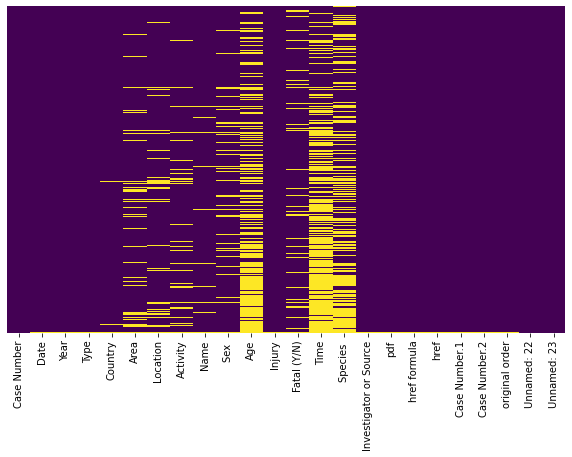

In [16]:
check_nan(shark)

Ahora ya tenemos datos con los que poder trabajar, vamos a centrarnos primero en las columnas con más nulos

# Columna "time" 

In [17]:
shark.Time.head(30)


0              18h00
1      14h00  -15h00
2              07h45
3                NaN
4                NaN
5                NaN
6     Late afternoon
7                NaN
8              17h00
9              14h00
10           Morning
11               NaN
12             15h00
13             08h15
14               NaN
15             11h00
16             10h30
17               NaN
18             10h40
19             16h50
20             07h00
21             09h30
22         Afternoon
23             21h50
24             09h40
25               NaN
26               NaN
27               NaN
28               NaN
29             08h00
Name: Time, dtype: object

Hay mucha variedad de datos en esta columna, por un lado tenemos horas, por otro lado tenemos mañana/tarde y para algunos tenemos nulos. Vamos a simplificar esta columna en "mañana", "tarde", "unknown"

In [18]:
#primero rellenamos los Nan con unkown
shark.Time.fillna("unkown",inplace=True)

In [19]:
shark.Time

0                18h00
1        14h00  -15h00
2                07h45
3               unkown
4               unkown
             ...      
6306            unkown
6307            unkown
6308            unkown
6309            unkown
25722           unkown
Name: Time, Length: 6311, dtype: object

In [20]:
afternoon=["13","14","15","16","17","18"]

In [21]:
aftern={"17":"Afternoon ","18":"After"}

# VOLVER LUEGO A LIMPIAR "TIME"

In [22]:
shark["nuevo_time"]=shark.Time.str.extract(r'(\d\d)')

In [23]:
shark["nuevo_time"].fillna("0",inplace=True)

In [24]:
shark["nuevo_time"]=shark["nuevo_time"].astype(dtype="int16")

In [25]:
shark["nuevo_time"].info()

<class 'pandas.core.series.Series'>
Int64Index: 6311 entries, 0 to 25722
Series name: nuevo_time
Non-Null Count  Dtype
--------------  -----
6311 non-null   int16
dtypes: int16(1)
memory usage: 61.6 KB


In [26]:
shark["nuevo_time"]

0        18
1        14
2         7
3         0
4         0
         ..
6306      0
6307      0
6308      0
6309      0
25722     0
Name: nuevo_time, Length: 6311, dtype: int16

In [27]:
a=0
for i in shark["nuevo_time"]:
    
    if i==0:
        shark["nuevo_time"][a]="0"
        a+=1
    
    elif 20>i>=13:
        shark["nuevo_time"][a]="Afternoon"
        a+=1
    
        
    elif 0<i<13:
        shark["nuevo_time"][a]="Morning"
        a+=1
        
    elif i>=20:
        shark["nuevo_time"][a]="Late Afternoon"
        a+=1
        
    

In [28]:
shark["nuevo_time"].head()

0    Afternoon
1    Afternoon
2      Morning
3            0
4            0
Name: nuevo_time, dtype: object

In [29]:
index1=shark["nuevo_time"][shark["nuevo_time"]=="0"].index

In [30]:
index1

Int64Index([   3,    4,    5,    6,    7,   10,   11,   14,   17,   22,
            ...
            6300, 6301, 6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309],
           dtype='int64', length=3934)

In [31]:
for i in index1:
    shark["nuevo_time"][i]=shark.Time[i]
    

In [32]:
shark["nuevo_time"]

0        Afternoon
1        Afternoon
2          Morning
3           unkown
4           unkown
           ...    
6306        unkown
6307        unkown
6308        unkown
6309        unkown
25722            0
Name: nuevo_time, Length: 6311, dtype: object

In [33]:
shark.Time=shark["nuevo_time"]

In [34]:
shark.Time.replace("Late afternoon","Late Afternoon",inplace=True)

In [35]:
shark.Time.replace("Night","Late Afternoon",inplace=True)

In [36]:
shark.Time.replace("After noon","Afternoon",inplace=True)

In [37]:
shark.Time.replace("Midnight","Late Afternoon",inplace=True)

In [38]:
shark.Time.replace('"Night"',"Late Afternoon",inplace=True)

In [39]:
shark.Time.replace("Dark","Late Afternoon",inplace=True)

In [40]:
shark.Time.replace("Late night","Late Afternoon",inplace=True)

In [41]:
shark.Time.replace("After midnight","Late Afternoon",inplace=True)

In [42]:
shark.Time.replace("FATAL  (Wire netting installed at local beaches after this incident.)","unknown",inplace=True)

In [43]:
shark.Time.replace("unkown","unknown",inplace=True)

In [44]:
shark.Time.replace("Evening","Afternoon",inplace=True)

In [45]:
shark.Time.replace("Early afternoon","Afternoon",inplace=True)

In [46]:
shark.Time.unique()

array(['Afternoon', 'Morning', 'unknown', 'Late Afternoon', 'Midday',
       '9h00', 'Morning ', 'Just before noon', 'Early morning', 'Dawn',
       'AM', 'A.M.', 'Dusk', 'Lunchtime', 'Sunset', '  ', '"Evening"',
       'Just before sundown', '--', '00h30', ' ', 'Early Morning',
       'Shortly after midnight', '\xa0 ', 'Late morning', 'P.M.',
       'After Dusk', 'Noon', '2 hours after Opperman', 'Mid afternoon',
       'Mid morning', 'Nightfall', 'X', 'Daybreak', 'Mid-morning',
       'Just before dawn', 'Daytime', '"After lunch"', 'night', 'Midday.',
       '"After dark"', '2 hrs before sunset', '"shortly before dusk"',
       'After dusk', 'Late afternon', '"Early evening"', '   ',
       'Before daybreak', 'dusk', 0], dtype=object)

In [47]:
shark.replace({"Time":{"Midday":"Afternoon","9h00":"Morning","Early morning":"Morning","Just before noon":"Morning","Sunset":"Late Afternoon","Evening":"Afternoon","--":"unknown","Early morning":"Morning","Morning ":"Morning","Early Morning":"Morning","Mid afternoon":"Afternoon","Mid morning":"Morning","AM":"Morning","Mid-morning":"Morning","Daytime":"unknown","After lunch":"Afternoon","Dawn":"Late Afternoon","morning":"Morning","Daybreak":"unknown","After lunch":"Afternoon","night":"Late Afternoon",'"Early evening"':"Afternoon","Before daybreak":"Afternoon","Dusk":"Afternoon","After Dusk":"Late Afternoon",'"After lunch"':"Afternoon","A.M.":"Morning","P.M.":"Afternoon","Midday.":"Afternoon",'"After dark"':"Late Afternoon"," ":"unknown","Late afternon":"Late Afternoon","dusk":"Afternoon",0:"unknown",'"Evening"':"Afternoon","2 hours after Opperman":"unknown"}},inplace=True)

In [48]:
shark.Time.unique()

array(['Afternoon', 'Morning', 'unknown', 'Late Afternoon', 'Lunchtime',
       '  ', 'Just before sundown', '00h30', 'Shortly after midnight',
       '\xa0 ', 'Late morning', 'Noon', 'Nightfall', 'X',
       'Just before dawn', '2 hrs before sunset', '"shortly before dusk"',
       'After dusk', '   '], dtype=object)

In [49]:
shark.drop("nuevo_time",axis=1,inplace=True)

# Columna "Species"

In [50]:
shark.rename(columns={"Species ":"Species"},inplace=True) #renombramos la columna para quitar el espacio

In [51]:
shark.Species

0            White shark
1                    NaN
2                    NaN
3              2 m shark
4        Tiger shark, 3m
              ...       
6306                 NaN
6307                 NaN
6308                 NaN
6309                 NaN
25722                NaN
Name: Species, Length: 6311, dtype: object

In [52]:
#Vamos a rellenar con "unkown" para las especies
shark.Species.fillna("unknown", inplace=True)

Más adelante limpiaremos su contenido

# Columna "Age"

In [53]:
shark.Age

0         57
1         11
2         48
3        NaN
4        NaN
        ... 
6306     NaN
6307     NaN
6308     NaN
6309     NaN
25722    NaN
Name: Age, Length: 6311, dtype: object

Rellenamos los nulos de la columna age con la media de edad de los datos que tenemos ya que nos conviene mantener en la columna todo valores numéricos en lugar de añadir alguna categoría como "unknown".

Primero cambiamos el tipo de dato de "Age" de objeto a int

In [54]:
shark["Age"]=shark.Age.str.extract(r'(\d\d)') #hay valores que tienen letras, por lo que cogemos solo los valores numéricos

In [55]:
shark.Age.fillna(0,inplace=True)

In [56]:
shark.Age=shark.Age.astype(dtype="int8")

In [57]:
shark.Age.replace(0, shark.Age.mean(),inplace=True) #sustituimos los 0 por la media 

# Columna "Sex"

In [58]:
shark["Sex "].head()  #Vamos a rellenar con "unkown"

0    F
1    F
2    M
3    M
4    M
Name: Sex , dtype: object

In [59]:
shark["Sex "].fillna("unknown", inplace=True)

In [60]:
shark.rename(columns={"Sex ":"Sex"},inplace=True) #renombramos la columna para quitar el espacio

# Columna"Activity" 

In [61]:
shark.Activity 

0           Paddling
1           Standing
2            Surfing
3            Surfing
4        Free diving
            ...     
6306             NaN
6307             NaN
6308             NaN
6309             NaN
25722            NaN
Name: Activity, Length: 6311, dtype: object

In [62]:
#Vamos a rellenar con "unkown" para las actividades que no conocemos

In [63]:
shark.Activity.fillna("unknown", inplace=True)

# Columna"Location"

In [64]:
shark.Location

0           Oceanside, San Diego County
1        St. Simon Island, Glynn County
2                          Habush, Oahu
3                    Arrawarra Headland
4                              La Ticla
                      ...              
6306                                NaN
6307                                NaN
6308                                NaN
6309                                NaN
25722                               NaN
Name: Location, Length: 6311, dtype: object

In [65]:
#Vamos a rellenar con "unkown" para los lugares que no conocemos
shark.Location.fillna("unknown", inplace=True)

'N nan cols: 16'

Case Number               0.015845
Date                      0.142608
Year                      0.174299
Type                      0.205990
Country                   0.934876
Area                      7.352242
Name                      3.470132
Injury                    0.586278
Fatal (Y/N)               8.683251
Investigator or Source    0.411979
pdf                       0.142608
href formula              0.158453
href                      0.142608
Case Number.1             0.142608
Case Number.2             0.142608
original order            0.031691
dtype: float64

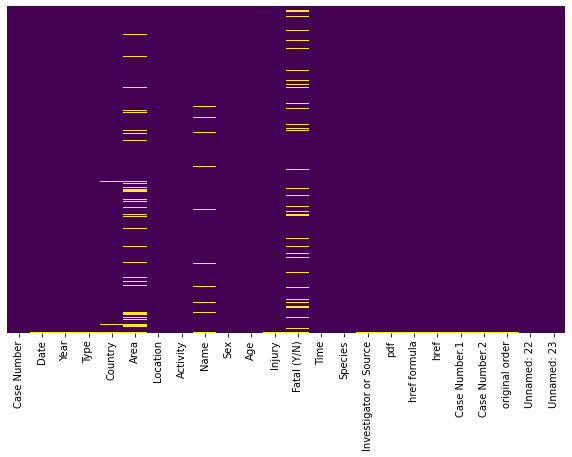

In [66]:
check_nan(shark)

# Columnas  "Area","Name","Fatal"

Para estas tres columnas vamos a rellenar con unknown ya que son
categóricos todos 

In [67]:
shark.Area.fillna("unknown", inplace=True)
shark.Name.fillna("unknown", inplace=True)
shark["Fatal (Y/N)"].fillna("unknown", inplace=True)

# Columna Date

In [68]:
shark.Date

0        25-Jun-2018
1        18-Jun-2018
2        09-Jun-2018
3        08-Jun-2018
4        04-Jun-2018
            ...     
6306             NaN
6307             NaN
6308             NaN
6309             NaN
25722            NaN
Name: Date, Length: 6311, dtype: object

In [69]:
shark.Date.unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1883-1889',
       '1845-1853', nan], dtype=object)

Más adelante veremos que es igual a las columnas CAse_number 1 y case number2 por lo que la sobrescribiremos

# Resto de columnas

Investigamos el resto de columnas para ver como rellenamos sus nulos

In [70]:
shark.Year.head()

0    2018.0
1    2018.0
2    2018.0
3    2018.0
4    2018.0
Name: Year, dtype: float64

In [71]:
#Convertimos la columna a integers
shark.Year.fillna(method="ffill",inplace=True)

In [72]:
shark.Year=shark.Year.astype(dtype="int")

In [73]:
shark.Year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988,
       1987, 1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976,
       1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943,
       1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932,
       1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921,
       1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910,
       1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899,
       1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888,
       1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877,
       1876, 1875, 1874, 1873, 1872, 1871, 1870, 18

Dejamos los valores como están ya que el 0 puede ser un año

'N nan cols: 12'

Case Number               0.015845
Date                      0.142608
Type                      0.205990
Country                   0.934876
Injury                    0.586278
Investigator or Source    0.411979
pdf                       0.142608
href formula              0.158453
href                      0.142608
Case Number.1             0.142608
Case Number.2             0.142608
original order            0.031691
dtype: float64

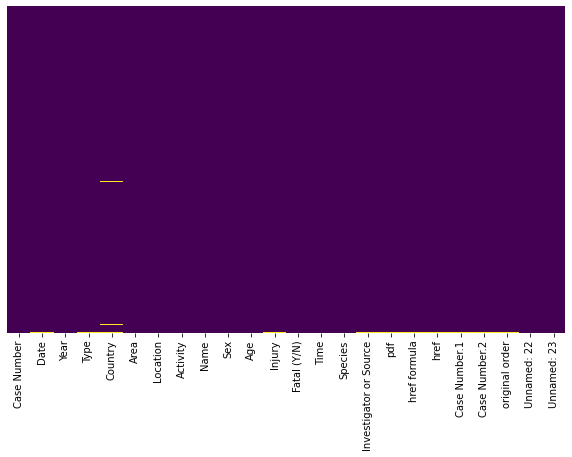

In [74]:
check_nan(shark)

In [75]:
shark["original order"]

0        6303.0
1        6302.0
2        6301.0
3        6300.0
4        6299.0
          ...  
6306     6308.0
6307     6309.0
6308     6310.0
6309        NaN
25722       NaN
Name: original order, Length: 6311, dtype: float64

In [76]:
shark["original order"].fillna(method="ffill",inplace=True) #Lo rellenamos con el número inmediatamente superior y le restamos uno

## queremos rellenar con el anterior y sumarle uno (falta inplace=True)

In [78]:
shark["Case Number.1"].head()

0    2018.06.25
1    2018.06.18
2    2018.06.09
3    2018.06.08
4    2018.06.04
Name: Case Number.1, dtype: object

In [79]:
shark.Date

0        25-Jun-2018
1        18-Jun-2018
2        09-Jun-2018
3        08-Jun-2018
4        04-Jun-2018
            ...     
6306             NaN
6307             NaN
6308             NaN
6309             NaN
25722            NaN
Name: Date, Length: 6311, dtype: object

In [80]:
shark["Case Number.2"]

0        2018.06.25
1        2018.06.18
2        2018.06.09
3        2018.06.08
4        2018.06.04
            ...    
6306            NaN
6307            NaN
6308            NaN
6309            NaN
25722           NaN
Name: Case Number.2, Length: 6311, dtype: object

In [81]:
pd.set_option("display.max_rows",None)
display(shark["Case Number.1"]).head()

0                2018.06.25
1                2018.06.18
2                2018.06.09
3                2018.06.08
4                2018.06.04
5              2018.06.03.b
6              2018.06.03.a
7                2018.05.27
8              2018.05.26.b
9              2018.05.26.a
10               2018.05.24
11               2018.05.21
12             2018.05.13.b
13             2018.05.13.a
14               2018.05.00
15               2018.05.12
16               2018.05.09
17             2018.04.30.R
18             2018.04.28.b
19             2018.04.28.a
20             2018.04.25.b
21             2018.04.25.a
22               2018.04.24
23               2018.04.23
24               2018.04.22
25               2018.04.19
26             2018.04.15.d
27             2018.04.15.c
28             2018.04.15.b
29             2018.04.15.a
30               2018.04.14
31             2018.04.10.R
32               2018.04.09
33               2018.04.05
34               2018.04.02
35               201

AttributeError: 'NoneType' object has no attribute 'head'

In [82]:
len(shark.drop_duplicates(subset=["Case Number.1","Case Number.2"]))==len(shark)

False

In [83]:
len(shark.drop_duplicates(subset=["Case Number","Case Number.2"]))==len(shark)

False

Lo de arriba quiere decir que las columnas "Case Number","Case Number.1","Case Number.2" son exactamente iguales, por lo que con arreglar la primera podemos copiar sus datos a la segunda

In [84]:
shark["Case Number.1"]=shark["Case Number.1"].str.extract(r'(\d\d\d\d.\d\d.\d\d)') 

He usado Regex para seleccionar las fechas en formato yyyy.mm.dd, de esta manera los elementos del final que son i.e ND-0154 se eliminan ya que no sabemos si esos números hace referencia al año, dia, mes....

Rellenamos los nan con la última fecha disponible ya que es la mas cercana



In [85]:
shark["Case Number.1"]=shark["Case Number.1"].str.replace('.', '-')

In [86]:
shark["Case Number.1"].head()

0    2018-06-25
1    2018-06-18
2    2018-06-09
3    2018-06-08
4    2018-06-04
Name: Case Number.1, dtype: object

Ponemos la columna en formato fecha

In [87]:

shark["Case Number.1"]=shark["Case Number.1"].str.replace('00', '01')

In [88]:
shark["Case Number.1"]=shark["Case Number.1"].str.replace('/', '-')

In [89]:
shark["Case Number.1"]=shark["Case Number.1"].str.replace(',', '-')

In [90]:
shark["Case Number.1"]=shark["Case Number.1"].replace("2014-17-28","2014-12-28")

In [91]:
shark["Case Number.1"]=shark["Case Number.1"].replace("2014-02-29","2014-02-28")

In [92]:
shark["Case Number.1"]=pd.to_datetime(shark["Case Number.1"], format='%Y-%m-%d',errors = 'coerce')

In [93]:
shark["Case Number.1"].fillna(method="ffill",inplace=True)

In [94]:
shark["Case Number.1"].isna().sum()

0

Sobreescribimos columna Case Number.2

In [95]:
shark["Case Number.2"]=shark["Case Number.1"]

Sobreescribimos columna Date

In [96]:
shark.Date=shark["Case Number.1"]

In [97]:
shark["Case Number.1"]

0       2018-06-25
1       2018-06-18
2       2018-06-09
3       2018-06-08
4       2018-06-04
5       2018-06-03
6       2018-06-03
7       2018-05-27
8       2018-05-26
9       2018-05-26
10      2018-05-24
11      2018-05-21
12      2018-05-13
13      2018-05-13
14      2018-05-01
15      2018-05-12
16      2018-05-09
17      2018-04-30
18      2018-04-28
19      2018-04-28
20      2018-04-25
21      2018-04-25
22      2018-04-24
23      2018-04-23
24      2018-04-22
25      2018-04-19
26      2018-04-15
27      2018-04-15
28      2018-04-15
29      2018-04-15
30      2018-04-14
31      2018-04-10
32      2018-04-09
33      2018-04-05
34      2018-04-02
35      2018-03-31
36      2018-03-14
37      2018-03-09
38      2018-03-09
39      2018-02-24
40      2018-02-23
41      2018-02-17
42      2018-02-15
43      2018-02-14
44      2018-02-11
45      2018-02-03
46      2018-02-01
47      2018-01-28
48      2018-01-21
49      2018-01-14
50      2018-01-13
51      2018-01-12
52      2018

Sobreescribimos columna Date

In [98]:
shark["Case Number"]=shark["Case Number.1"]

'N nan cols: 7'

Type                      0.205990
Country                   0.934876
Injury                    0.586278
Investigator or Source    0.411979
pdf                       0.142608
href formula              0.158453
href                      0.142608
dtype: float64

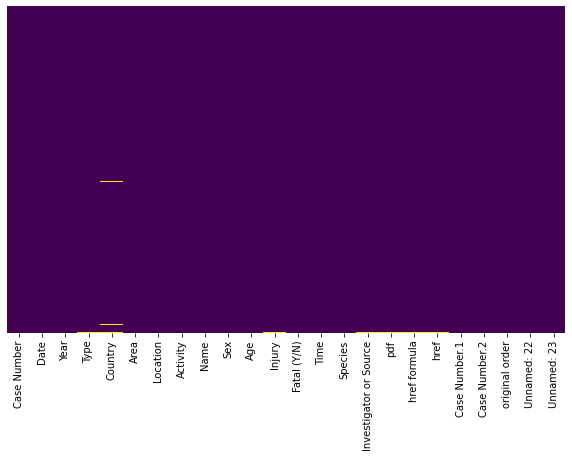

In [99]:
check_nan(shark)

# Rellenamos el resto de categorias con "unknown"

In [100]:
nan_cols=shark.isna().sum()
lst=list(nan_cols[nan_cols>1].index)

In [101]:
lst

['Type',
 'Country',
 'Injury',
 'Investigator or Source',
 'pdf',
 'href formula',
 'href']

In [102]:
shark.Type.fillna("unknown",inplace=True)

In [103]:
shark.Country.fillna("unknown",inplace=True)

In [104]:
shark.Injury.fillna("unknown",inplace=True)

In [105]:
shark['Investigator or Source'].fillna("unknown",inplace=True)

In [106]:
shark.pdf.fillna("unknown",inplace=True)

In [107]:
shark['href formula'].fillna("unknown",inplace=True)

In [108]:
shark.href.fillna("unknown",inplace=True)

'N nan cols: 0'

Series([], dtype: float64)

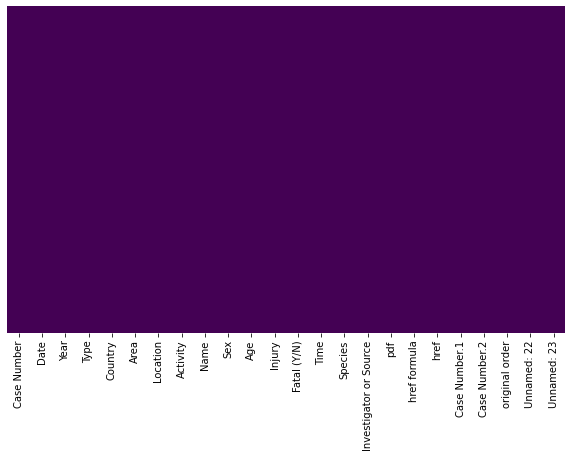

In [109]:
check_nan(shark)

# Columna "Name"

In [110]:
shark.Name

0                                              Julie Wolfe
1                                          Adyson McNeely 
2                                              John Denges
3                                                     male
4                                           Gustavo Ramos 
5                                                  Chris 

6                                   Jose Ernesto da Silva 
7                                                     male
8                                                Cody High
9                                                     male
10                                                    male
11                                            Trey de Boer
12                                             Jei Turrell
13                                            Max Berryman
14                                         Melisa Brunning
15                                                    male
16                                                    ma

In [111]:
import re

In [112]:
shark.Name.re.findall(r'(?:(?<=^)|(?<=[^A-Za-z.,]))[A-Za-z.,]+(?: [A-Za-z.,]+)*(?:(?=[^A-Za-z.,])|(?=$))')

AttributeError: 'Series' object has no attribute 're'

In [ ]:
lista=[]

for i in shark.Name:

re.findall(r'(?<!^)(?<!\. )[A-Z][a-z]+',i)
lista.append(a)



## Luego continuamos limpiando Name

# Limpiamos "Species"

In [119]:
shark.Species

0                                              White shark
1                                                  unknown
2                                                  unknown
3                                                2 m shark
4                                          Tiger shark, 3m
5                                                  unknown
6                                              Tiger shark
7                                          Lemon shark, 3'
8                                           Bull shark, 6'
9                                                  unknown
10                                         Grey reef shark
11                                                 unknown
12                                                 unknown
13                                        Invalid incident
14                                   Tawny nurse shark, 2m
15                                                 unknown
16                         Shark involvement not confirm

In [114]:
shark.Species.unique()

array(['White shark', 'unknown', '2 m shark', ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

In [117]:
#Vamos a eliminar los números ya que no nos interesa eltamaño del tiburón ahora mismo
shark["esp2"]=shark.Species.str.replace("\d\s(m)"," ").head()

In [120]:
shark["esp2"]=shark.Species

In [121]:
shark.esp2

0                                              White shark
1                                                  unknown
2                                                  unknown
3                                                2 m shark
4                                          Tiger shark, 3m
5                                                  unknown
6                                              Tiger shark
7                                          Lemon shark, 3'
8                                           Bull shark, 6'
9                                                  unknown
10                                         Grey reef shark
11                                                 unknown
12                                                 unknown
13                                        Invalid incident
14                                   Tawny nurse shark, 2m
15                                                 unknown
16                         Shark involvement not confirm

In [ ]:
shark.esp1=shark.esp1.str.replace("\d\w(m) "," ").head()

In [ ]:
shark.esp1.head()

In [ ]:
shark["esp1"]=shark.Species.str.replace("\d"," ").head()

In [ ]:
shark.esp1=shark.esp1.str.extract(r'(\w+)\s+shark')

In [ ]:
shark.esp1